# Background

Links:
- [Docs](https://skope-rules.readthedocs.io/en/latest/)
- [Interpretable ML - RuleFit](https://christophm.github.io/interpretable-ml-book/rulefit.html)
- [Skope-Rules GitHub](https://github.com/scikit-learn-contrib/skope-rules)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# necessary to avoid import error
import six
import sys
sys.modules['sklearn.externals.six'] = six

from skrules import SkopeRules
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

plt.style.use("../style.mplstyle")

In [2]:
data = pd.read_csv("../data/cardio.csv", sep=";", index_col=0)
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values
print(f"Number of records         : {X.shape[0]}")
print(f"Number of features        : {X.shape[1]}")
print(f"Count of positive outcomes: {sum(y)} ({sum(y)/len(y)*100:.1f}%)")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
data.sample(10)

Number of records         : 70000
Number of features        : 11
Count of positive outcomes: 34979 (50.0%)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
69432,20586,1,165,67.0,120,80,1,1,0,0,1,1
33426,15229,2,165,62.0,120,70,1,1,0,0,1,1
73032,17609,1,163,70.0,110,70,1,1,0,0,1,0
94799,20248,1,163,84.0,160,100,2,1,0,0,1,1
77821,15326,2,182,93.0,150,100,1,1,1,0,1,1
81052,16075,2,188,101.0,130,80,1,1,0,0,1,0
48476,20341,1,156,74.0,120,80,1,1,0,0,1,0
26235,21274,1,175,80.0,120,80,2,1,0,0,1,0
27916,21379,1,171,83.0,120,80,1,1,0,0,1,1


In [3]:
sr = SkopeRules(
    max_depth_duplication=3,
    n_estimators=20,
    precision_min=0.5,
    recall_min=0.01,
    feature_names=data.columns[:-1],
    n_jobs=-1,
    max_depth=3,
    random_state=42
)
sr.fit(X_train, y_train)

SkopeRules(feature_names=Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object'),
           max_depth_duplication=3, n_estimators=20, n_jobs=-1,
           random_state=42)

In [4]:
for rule in sr.rules_:
    print(rule)
    print()

('ap_hi > 148.5', (0.8622448491336211, 0.23506859227977642, 6))

('ap_hi <= 149.5 and ap_hi > 138.5', (0.8157793485679389, 0.2299405280656408, 34))

('ap_hi <= 138.5 and ap_hi > 129.5 and cholesterol <= 2.5', (0.5458955206192574, 0.11772955601740878, 40))

('ap_hi <= 138.5 and ap_hi > 129.5 and cholesterol > 2.5', (0.7947973309229587, 0.03907944506448537, 40))

('age > 19940.5 and ap_hi <= 129.5 and cholesterol > 2.5', (0.7046224374726495, 0.032867129021024295, 4))

('age <= 19995.5 and ap_hi <= 129.5 and cholesterol > 2.5', (0.5888063321280537, 0.01891964008968584, 4))



In [5]:
# score of SkopeRules
print(roc_auc_score(y_test, sr.predict(X_test)))
fpr, tpr, _ = roc_curve(y_test, sr.decision_function(X_test))

0.729486395372458


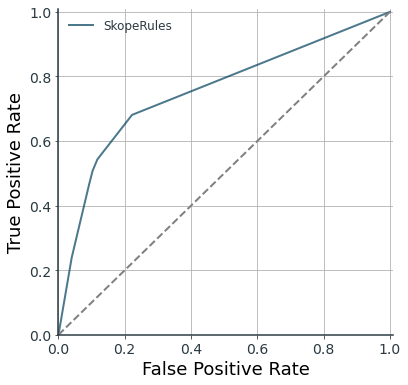

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label="SkopeRules", alpha=0.7)
ax.plot([0, 1], [0, 1], linestyle='--', c="grey")
ax.set_xlim([0, 1.01])
ax.set_ylim([0, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
ax.grid();

('ap_hi > 148.5', (0.8622448491336211, 0.23506859227977642, 6)) 

0.5993558455362643


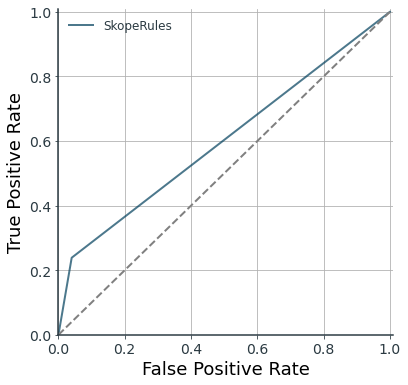

In [7]:
# top rule only
print(sr.rules_[0], "\n")
print(roc_auc_score(y_test, sr.predict_top_rules(X_test, n_rules=1)))
fpr, tpr, _ = roc_curve(y_test, sr.predict_top_rules(X_test, n_rules=1))
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(fpr, tpr, label="SkopeRules", alpha=0.7)
ax.plot([0, 1], [0, 1], linestyle='--', c="grey")
ax.set_xlim([0, 1.01])
ax.set_ylim([0, 1.01])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()
ax.grid();